## Car insurance

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/car_insurance.csv')
data.info()
print(data.vehicle_year.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

### Data preparation

In [3]:
print(f'data info BEFORE: \n{data.info()}')
data.age = data.age.astype('category')
data.gender = data.gender.astype('bool')
data.driving_experience = data.driving_experience.astype('category')
data.education = data.education.astype('category')
data.income = data.income.astype('category')
data.vehicle_ownership = data.vehicle_ownership.astype('category')
# data.vehicle_year = data.vehicle_year.astype('bool')
# data.married = data.married.astype('bool')
data.children = data.children.astype('int32')
data.past_accidents = data.past_accidents.astype('int32')
data.duis = data.duis.astype('int32')
data.speeding_violations = data.speeding_violations.astype('int32')
data.annual_mileage.fillna(data.annual_mileage.mean(), inplace=True)
# data.annual_mileage = data.annual_mileage.astype('int64')
data.credit_score.fillna(data.credit_score.mean(), inplace=True)

print(f'data info AFTER: \n {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

### Data exploration

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


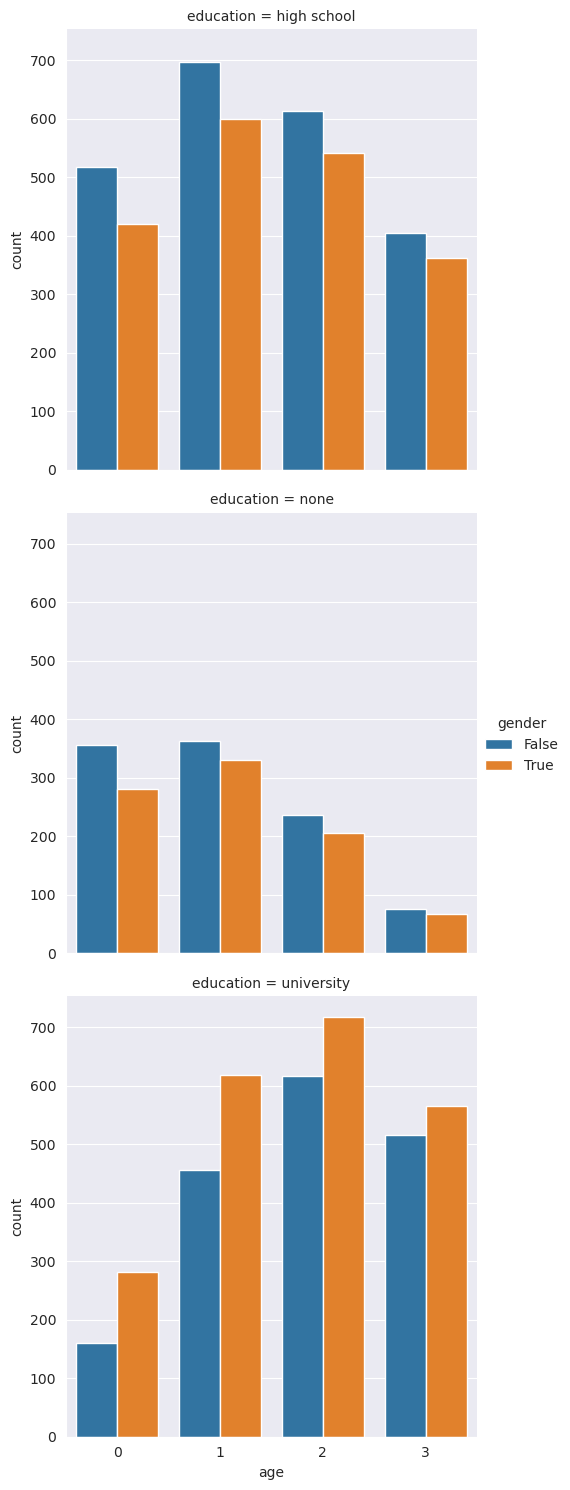

In [4]:
sns.catplot(data=data, x='age', kind='count', hue='gender', row='education')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


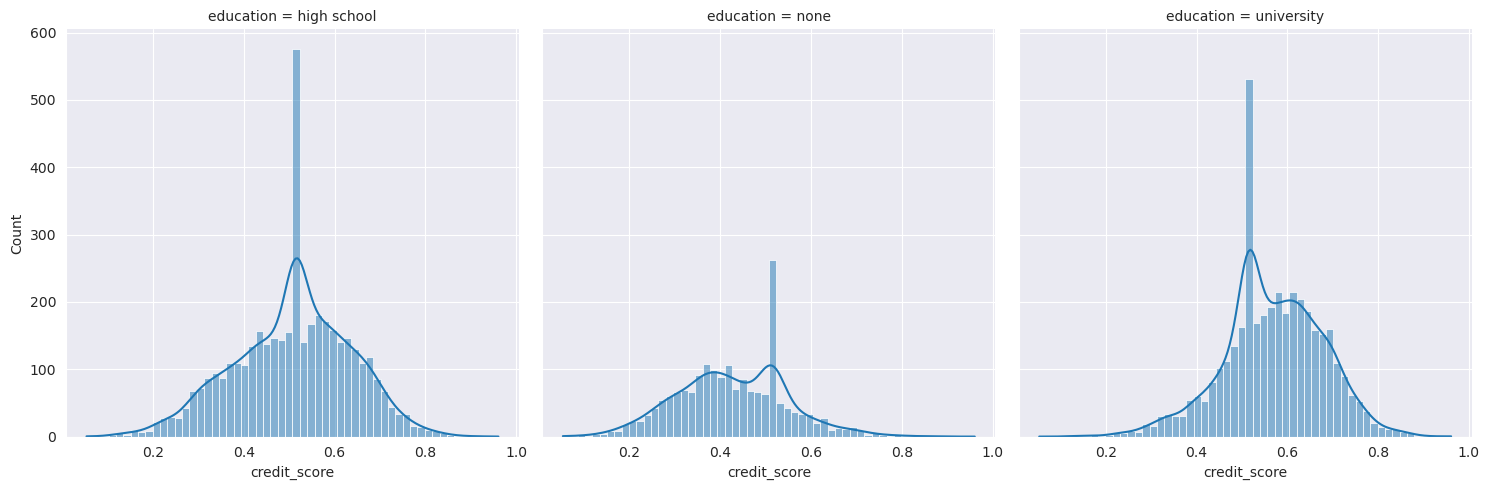

In [5]:
sns.displot(data=data, x='credit_score', kde=True, col='education')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


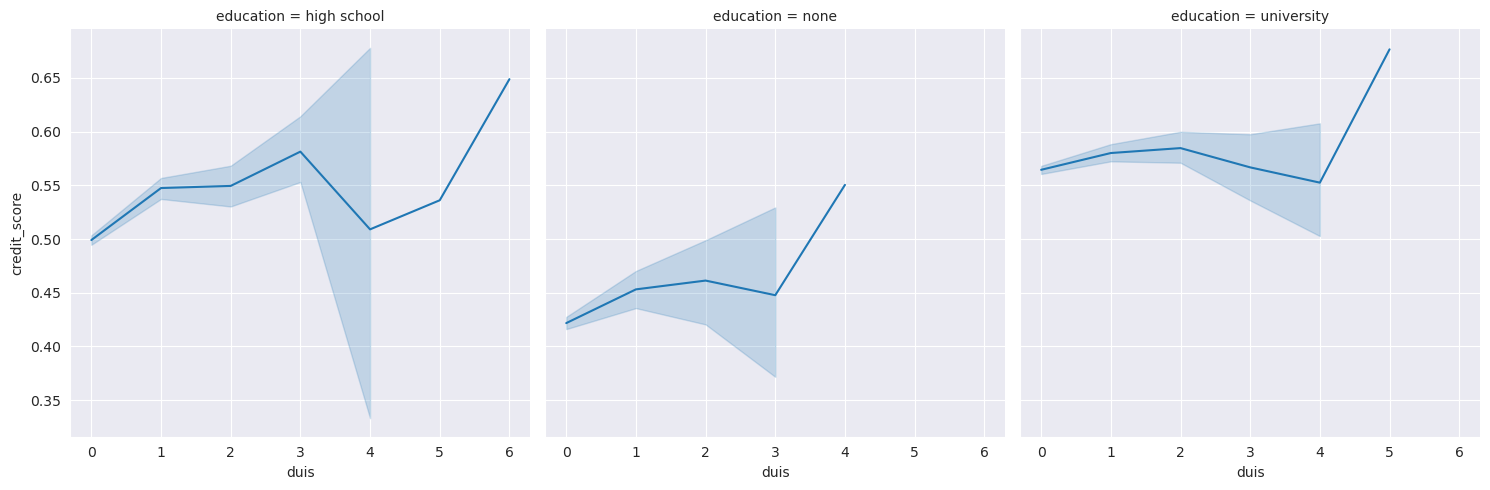

In [6]:
sns.relplot(data=data, x='duis', y='credit_score', kind='line', col='education')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


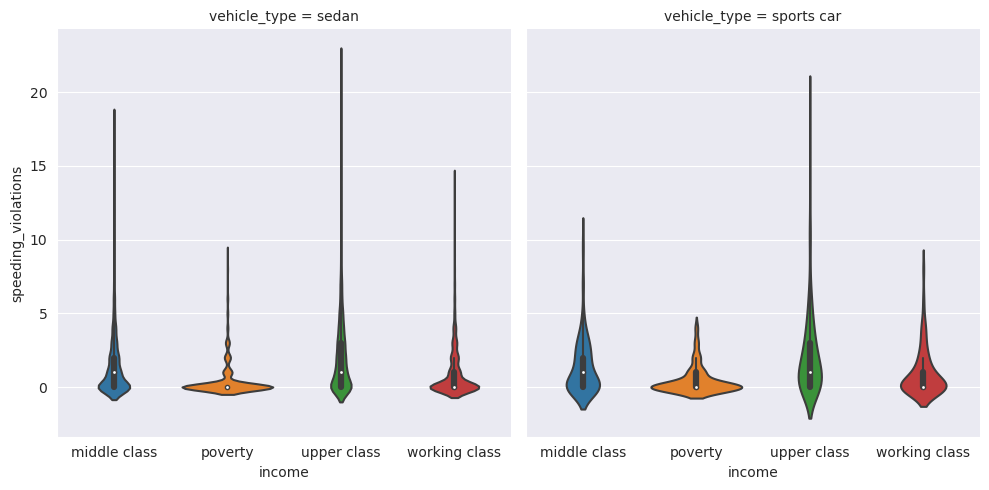

In [7]:
sns.catplot(data=data, x='income', y='speeding_violations', kind='violin', col='vehicle_type')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


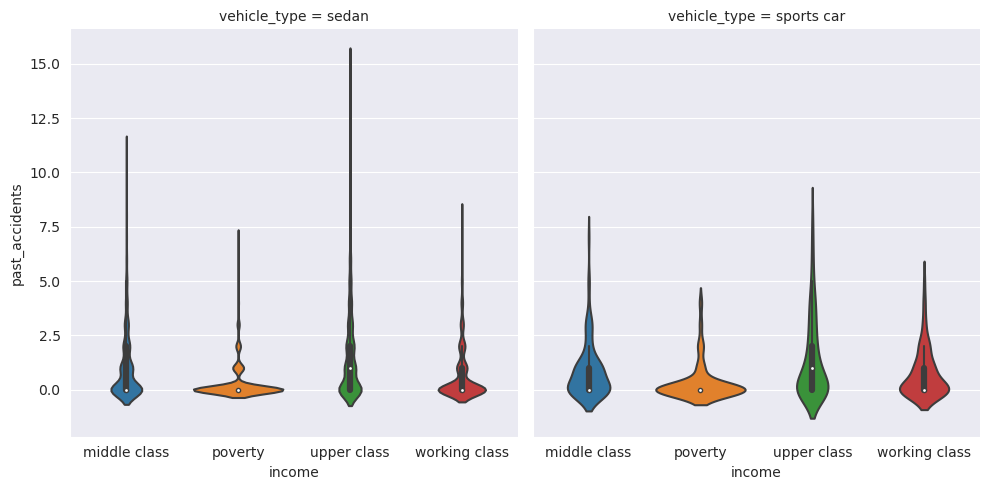

In [8]:
sns.catplot(data=data, x='income', y='past_accidents', kind='violin', col='vehicle_type')

<Axes: xlabel='speeding_violations', ylabel='credit_score'>

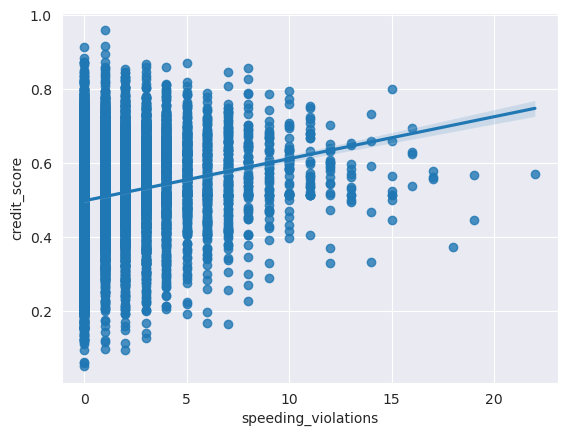

In [9]:
sns.regplot(data=data, x='speeding_violations', y='credit_score')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


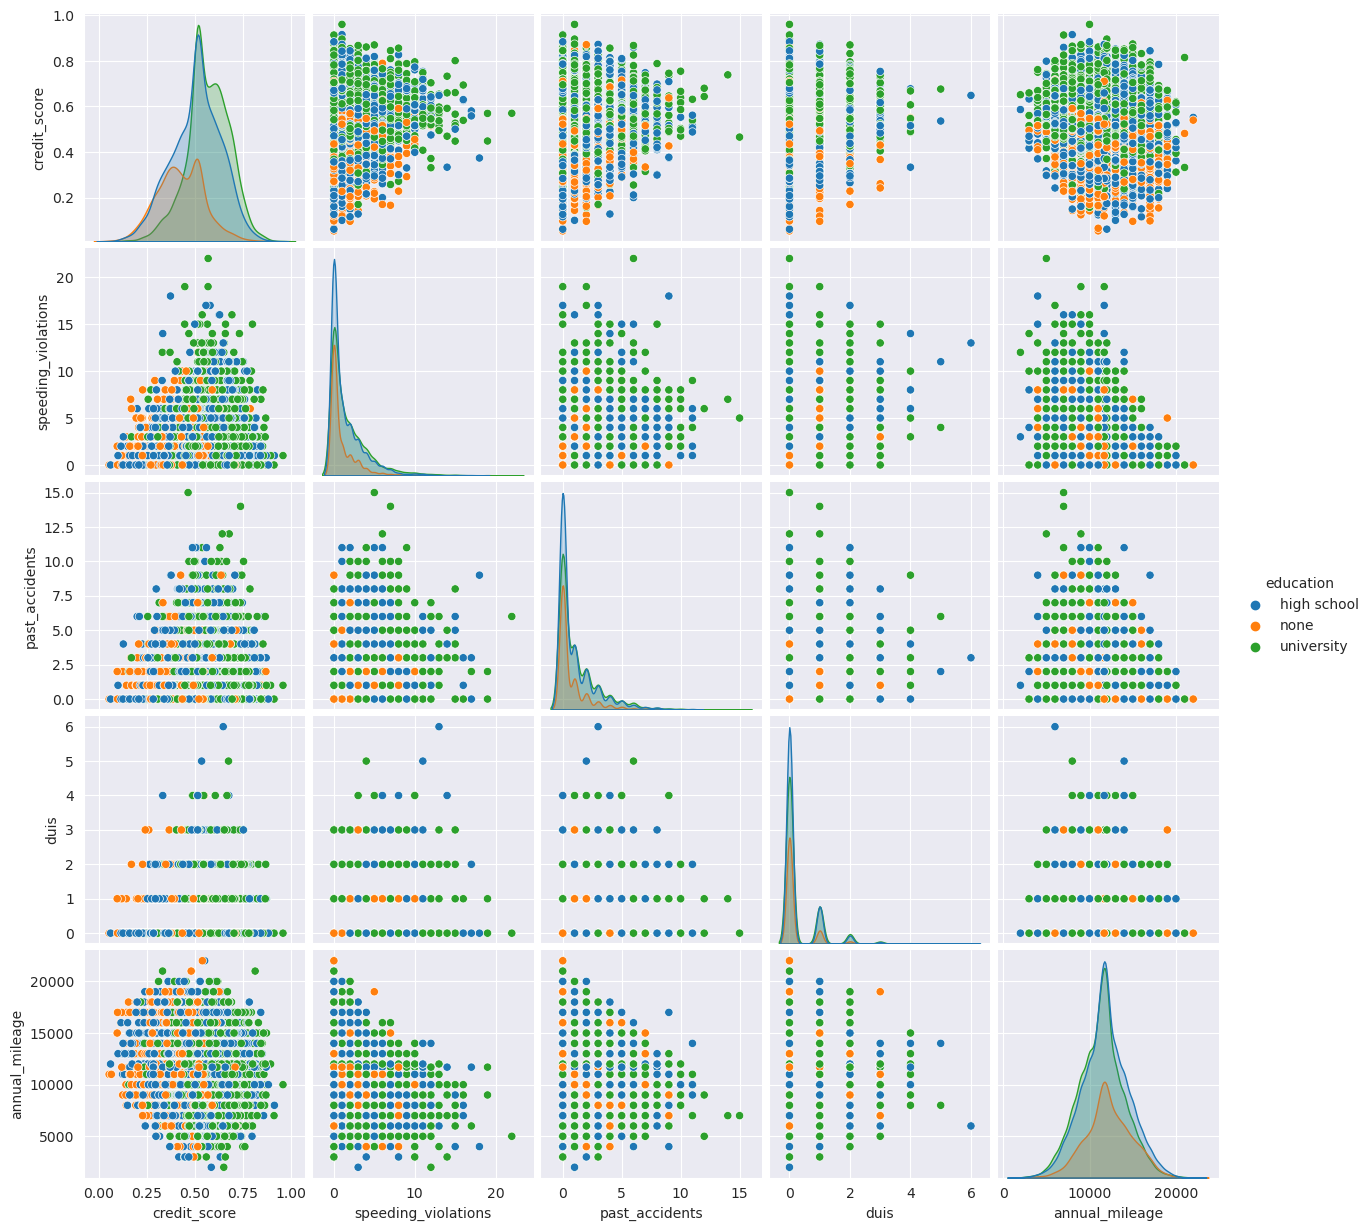

In [10]:
data_num = data[['credit_score', 'speeding_violations', 'past_accidents', 'duis', 'annual_mileage', 'education']]

sns.pairplot(data_num, hue='education')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


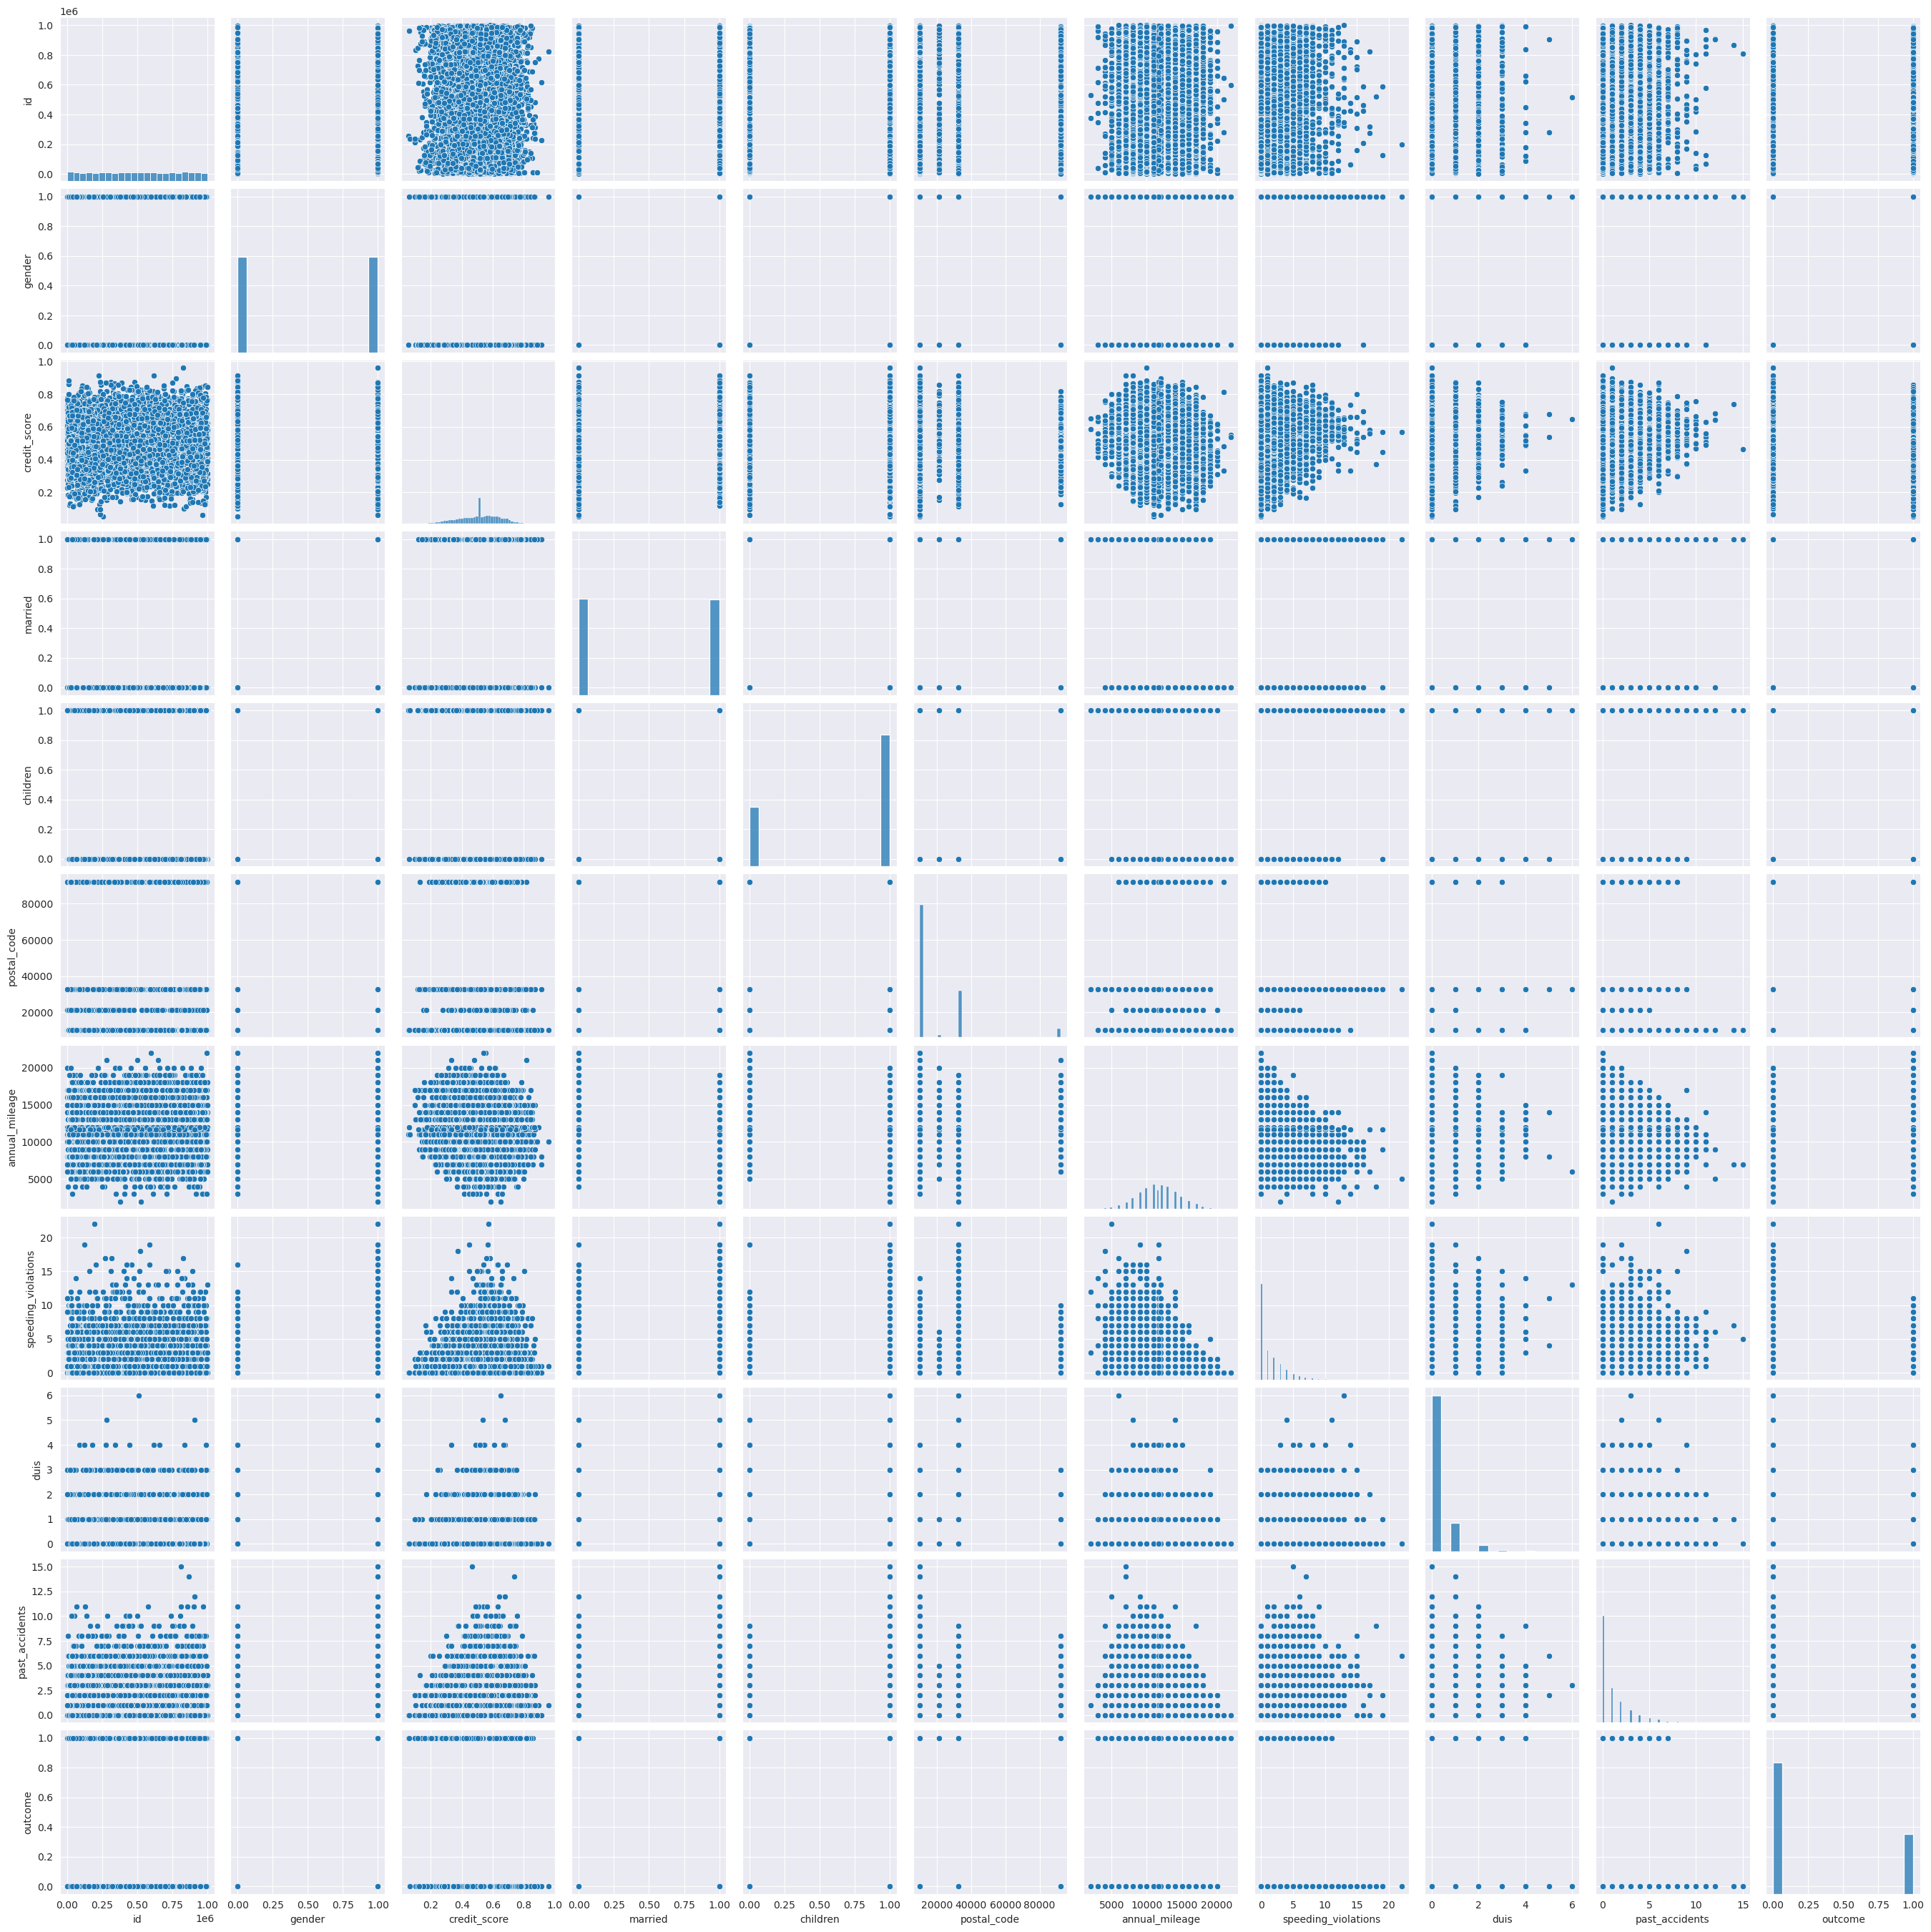

In [11]:
sns.pairplot(data=data)

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, BERT to T5
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CoLA    8 non-null      float64
 1   MNLI    8 non-null      float64
 2   MRPC    8 non-null      float64
 3   QNLI    8 non-null      float64
 4   QQP     8 non-null      float64
 5   RTE     8 non-null      float64
 6   SST-2   8 non-null      float64
 7   STS-B   8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes
Task         CoLA  MNLI  MRPC  QNLI   QQP   RTE  SST-2  STS-B
Model                                                        
BERT         60.5  86.7  89.3  92.7  72.1  70.1   94.9   87.6
BiLSTM       11.6  65.6  81.8  74.6  62.5  57.4   82.8   70.3
BiLSTM+Attn  18.6  67.6  83.9  74.3  60.1  58.4   83.0   72.8
BiLSTM+CoVe  18.5  65.4  78.7  70.8  60.6  52.7   81.9   64.4
BiLSTM+ELMo  32.1  67.2  84.7  75.5  61.1  57.4   89.3   70.3


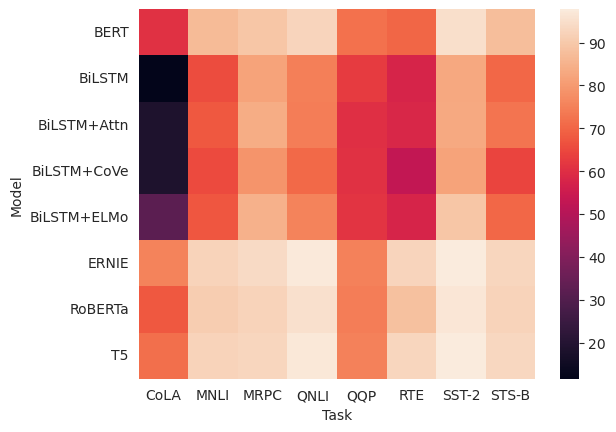

In [12]:
## Heatmap example
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)
glue.info()
print(glue.head())

### Logistic regression



Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                 0.07907
Time:                        11:40:55   Log-Likelihood:                -5725.6
converged:                       True   LL-Null:                       -6217.2
Covariance Type:            nonrobust   LLR p-value:                8.161e-216
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9502      0.093     20.866      0.000       1.767       2.133
credit_score    -5.4645

<Axes: xlabel='credit_score', ylabel='outcome'>

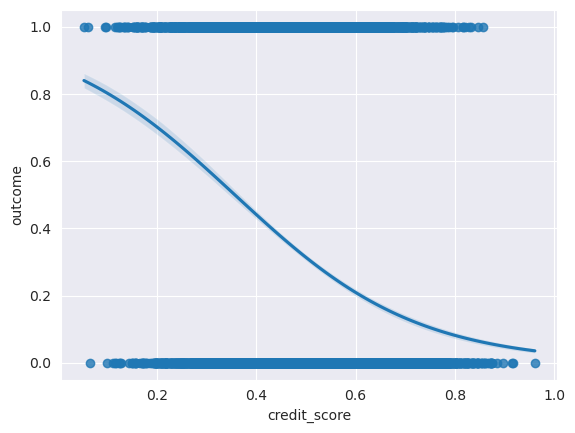

In [13]:
model = logit("outcome ~ credit_score", data=data).fit()
print(model.summary())
# print(model.params)
sns.regplot(data=data, x='credit_score', y='outcome', logistic=True)

In [14]:
conf_matrix = model.pred_table()
print(conf_matrix)

# mosaic(conf_matrix)

[[6321.  546.]
 [2400.  733.]]


Optimization terminated successfully.
         Current function value: 0.621700
         Iterations 5


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6832835820895523, 0.9966777408637874),
  ('0', '1'): (0.0, 1.0, 0.6832835820895523, 0.0),
  ('1', '0'): (0.6882587064676617,
   0.0,
   0.31174129353233837,
   0.9966777408637874),
  ('1', '1'): (0.6882587064676617, 1.0, 0.31174129353233837, 0.0)})

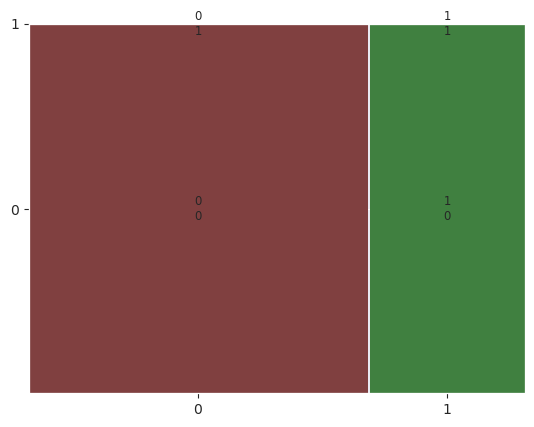

In [15]:
mod_test = logit("outcome ~ vehicle_type", data=data).fit()
# print(mod_test.summary())
# sns.regplot(data=data, x='vehicle_type', y='outcome', logistic=True)
mosaic(mod_test.pred_table())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10000 non-null  int64   
 1   age                  10000 non-null  category
 2   gender               10000 non-null  bool    
 3   driving_experience   10000 non-null  category
 4   education            10000 non-null  category
 5   income               10000 non-null  category
 6   credit_score         10000 non-null  float64 
 7   vehicle_ownership    10000 non-null  category
 8   vehicle_year         10000 non-null  object  
 9   married              10000 non-null  float64 
 10  children             10000 non-null  int32   
 11  postal_code          10000 non-null  int64   
 12  annual_mileage       10000 non-null  float64 
 13  vehicle_type         10000 non-null  object  
 14  speeding_violations  10000 non-null  int32   
 15  duis                

In [19]:
models = []

features = data.drop(columns = ['id', 'outcome']).columns
summary = {}

for i in features:
    model = logit("outcome ~ " + i, data=data).fit()
    conf_matrix = model.pred_table()
    accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / (conf_matrix[0,1] + conf_matrix[1,0] + conf_matrix[1,1] + conf_matrix[0,0])
    summary[i] = accuracy

print(summary)

Optimization terminated successfully.
         Current function value: 0.506484
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [20]:
summary_sorted_dict = dict(sorted(summary.items(), key=lambda x: x[1], reverse=True))
print(summary_sorted)

{'driving_experience': 0.7771, 'age': 0.7747, 'income': 0.7425, 'vehicle_ownership': 0.7351, 'credit_score': 0.7054, 'annual_mileage': 0.6904, 'gender': 0.6867, 'education': 0.6867, 'vehicle_year': 0.6867, 'married': 0.6867, 'children': 0.6867, 'postal_code': 0.6867, 'vehicle_type': 0.6867, 'speeding_violations': 0.6867, 'duis': 0.6867, 'past_accidents': 0.6867}


In [25]:
summary_sorted = sorted(summary.items(), key=lambda x: x[1], reverse=True)
print(summary_sorted)

[('driving_experience', 0.7771), ('age', 0.7747), ('income', 0.7425), ('vehicle_ownership', 0.7351), ('credit_score', 0.7054), ('annual_mileage', 0.6904), ('gender', 0.6867), ('education', 0.6867), ('vehicle_year', 0.6867), ('married', 0.6867), ('children', 0.6867), ('postal_code', 0.6867), ('vehicle_type', 0.6867), ('speeding_violations', 0.6867), ('duis', 0.6867), ('past_accidents', 0.6867)]
<class 'tuple'>


In [41]:
best_feature_df = pd.DataFrame({'best_feature': [summary_sorted[0][0]], 'best_accuracy': [summary_sorted[0][1]]})
print(best_feature_df)

         best_feature  best_accuracy
0  driving_experience         0.7771
